<a href="https://colab.research.google.com/github/ufuomaibude/CUSTOMER-PROFILING-AND-CONVERSION-OPTIMIZATION-IN-FREIGHT-CRM-A-DATA-DRIVEN-ANALYSIS/blob/main/TudorML%26Clustering_data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
# Filter out FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/Tudordata3_analysis1.xlsx")

In [ ]:
df

,Record ID,Tudor Contact,Company Name,Export From,Import To,Transport Mode,Prospect Postcode,COST IN,QUOTE OUT,Last Communication Date,Create Date,Last Modified Date,Match_Result,Year,Month,Day,Month Name
0,25721951,JH,Ain Shams University Racing Team,UK,UK,Road,Silverstone,0.0,712.0,2023-03-13 00:00:00,2023-05-10 15:48:00,2024-06-17 16:08:00,Not Converted,2023,5,10,May
1,292609,AJ,Brinkley Propeller Services,UK,NIGERIA,Air,SG18 8UB,0.0,4367.0,2023-03-06 00:00:00,2019-10-11 15:38:00,2024-07-18 11:39:00,Not Converted,2019,10,11,October
2,5643801,AJ,Caio Shea Butter,UK,UGANDA,Air,Kerbside UK,0.0,1240.0,2020-07-23 00:00:00,2020-07-22 14:33:00,2024-07-11 09:20:00,Not Converted,2020,7,22,July
3,290526,AJ,Concept Building Services Ltd,UK,SUDAN,Sea - FCL,GU29 9DQ,0.0,235.0,2016-11-28 00:00:00,2019-10-11 15:44:00,2024-07-18 10:10:00,Not Converted,2019,10,11,October
4,27613101,AJ,Consolidation Shipping & Logistics (Pvt.) Ltd,UK,PAKISTAN,Sea - FCL,Sheffield,0.0,475.0,2023-11-28 00:00:00,2023-08-25 16:34:00,2024-06-13 10:17:00,Not Converted,2023,8,25,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,27811001,CB,Ziegler Uk Ltd,UK,MAURITIUS,Air,HG3,0.0,5126.0,2023-08-18 00:00:00,2023-09-05 13:56:00,2024-06-06 12:18:00,Not Converted,2023,9,5,September
2367,23933501,JH,Zinc Fsd Ltd,INDIA,UK,Sea - FCL,Mumbai,0.0,5835.0,2023-02-22 00:00:00,2023-01-25 15:04:00,2024-06-21 10:50:00,Not Converted,2023,1,25,January
2368,326953,AJ,Ziotis International Limited,UK,BARBADOS,Air,Leicester,0.0,320.0,2016-04-07 00:00:00,2019-10-14 09:44:00,2024-07-15 15:03:00,Not Converted,2019,10,14,October
2369,26502751,AJ,Zone Aval Portuaire,UK,CAMEROON,Air,NPP,0.0,551.0,2023-10-31 00:00:00,2023-06-28 12:29:00,2024-06-13 17:05:00,Not Converted,2023,6,28,June


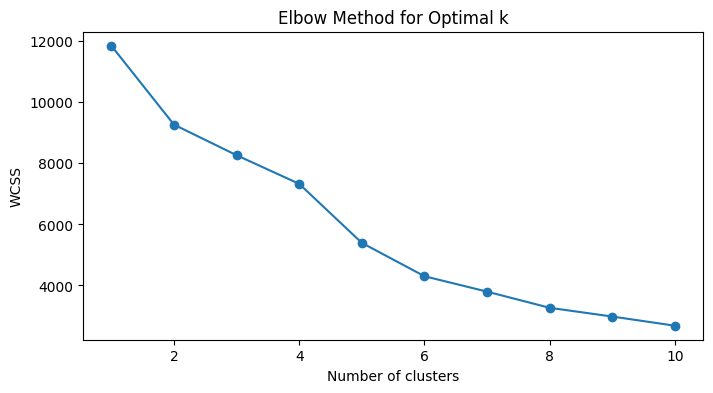

Silhouette Score for 3 clusters: 0.264


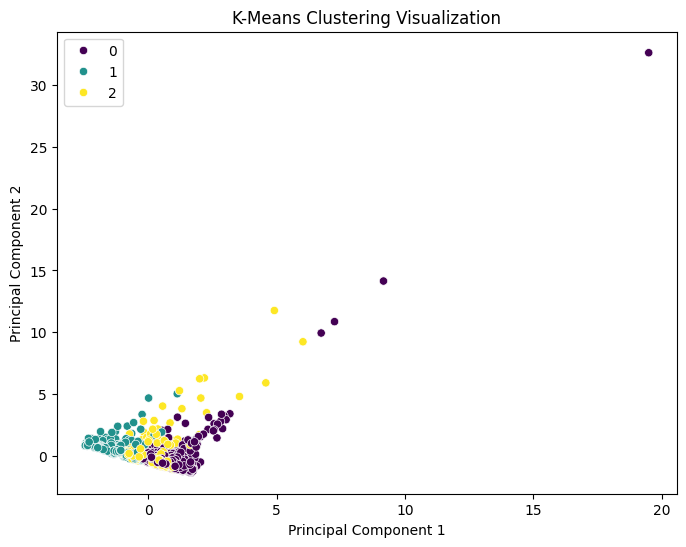

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#

# Select only the numerical columns for clustering
numeric_cols = ['QUOTE OUT', 'COST IN', 'Year', 'Month', 'Day']
df_numeric = df[numeric_cols]

# Standardize the data to give each feature equal weight
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Optional: Use the Elbow Method to determine a suitable number of clusters
wcss = []  # Within-Cluster Sum of Squares
max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow curve, choose the number of clusters (e.g., k=3)
optimal_k = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Optional: Evaluate the clustering using the silhouette score
score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score for {optimal_k} clusters: {score:.3f}')

# Visualize clusters (using the first two principal components for visualization purposes)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Unique cluster labels: [-1  0  1]
Silhouette Score: 0.129


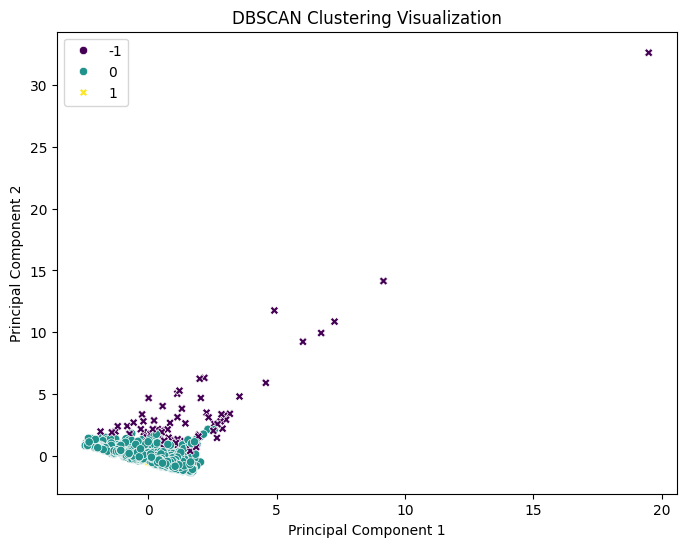

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



# Select only the numerical columns for clustering
numeric_cols = ['QUOTE OUT', 'COST IN', 'Year', 'Month', 'Day']
df_numeric = df[numeric_cols]

# Standardize the data to ensure all features contribute equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Apply DBSCAN clustering
# The choice of eps and min_samples is data-dependent. Adjust these parameters based on your dataset.
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Example parameters; tweak them as needed
clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Print out the unique clusters identified (-1 denotes noise points)
print("Unique cluster labels:", np.unique(clusters))

# Optional: Evaluate clustering performance using the silhouette score (if at least 2 clusters found)
if len(set(clusters)) - (1 if -1 in clusters else 0) > 1:
    score = silhouette_score(X_scaled, clusters)
    print(f'Silhouette Score: {score:.3f}')
else:
    print("Silhouette score cannot be calculated because less than 2 clusters were identified.")

# Visualize the clusters using PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=clusters, palette='viridis',
                style=(clusters == -1), legend='full')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


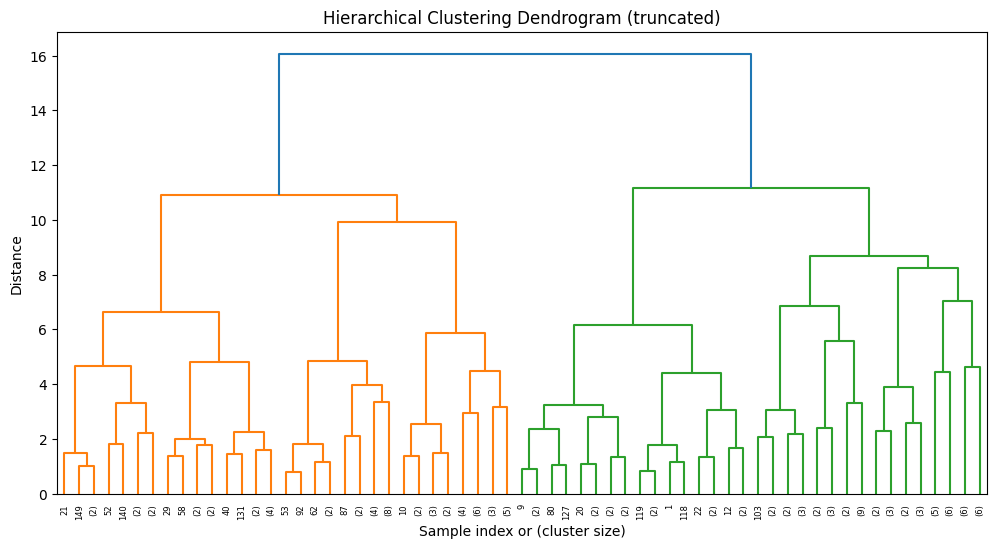

Cluster labels assigned:
 Cluster
0    70
1    57
2    23
Name: count, dtype: int64


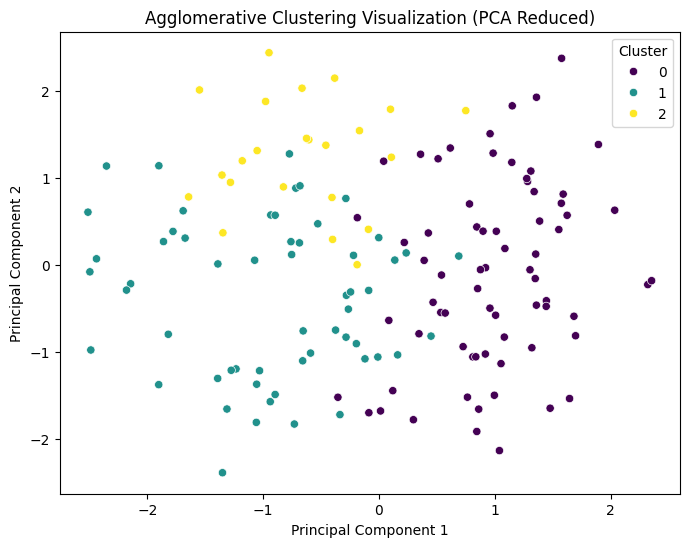

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# For dendrogram plotting
from scipy.cluster.hierarchy import dendrogram, linkage

# -------------------------------
# Data Preparation
# -------------------------------

# Example: Creating a sample DataFrame (Replace this with your actual data loading, e.g., pd.read_csv)
np.random.seed(42)
data = {
    'QUOTE OUT': np.random.uniform(100, 1000, 150),
    'COST IN': np.random.uniform(50, 500, 150),
    'Year': np.random.choice([2020, 2021, 2022, 2023], 150),
    'Month': np.random.randint(1, 13, 150),
    'Day': np.random.randint(1, 29, 150)
}
df = pd.DataFrame(data)

# Select the numeric columns for clustering
numeric_cols = ['QUOTE OUT', 'COST IN', 'Year', 'Month', 'Day']
df_numeric = df[numeric_cols]

# Standardize the data to ensure all features contribute equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# -------------------------------
# Hierarchical Clustering (Dendrogram)
# -------------------------------
# Compute the linkage matrix using Ward's method
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# -------------------------------
# Agglomerative Clustering using scikit-learn
# -------------------------------
# Define the number of clusters (adjust based on the dendrogram or your requirements)
n_clusters = 3

# Create and fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = agg_cluster.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels
print("Cluster labels assigned:\n", df['Cluster'].value_counts())

# -------------------------------
# Visualization of Clusters using PCA
# -------------------------------
# Reduce dimensionality for visualization purposes
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Agglomerative Clustering Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


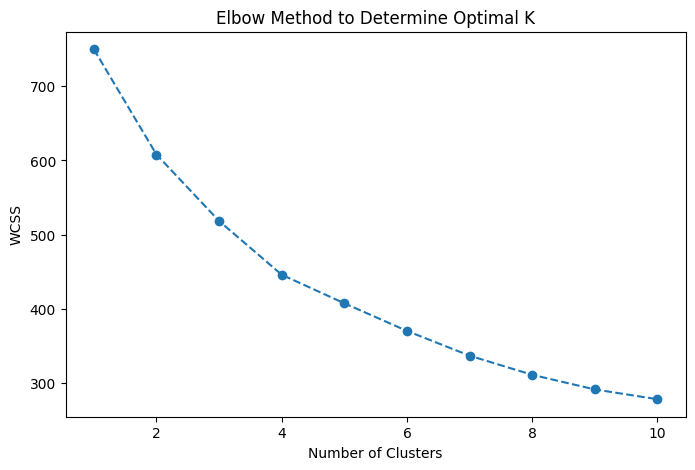

Cluster Centroids:
    QUOTE OUT     COST IN         Year      Month        Day
0  332.211862  294.888648  2021.174603   4.539683  16.650794
1  725.416981  322.700883  2022.590909   6.545455   9.204545
2  604.466715  224.556177  2020.813953  10.116279  17.906977


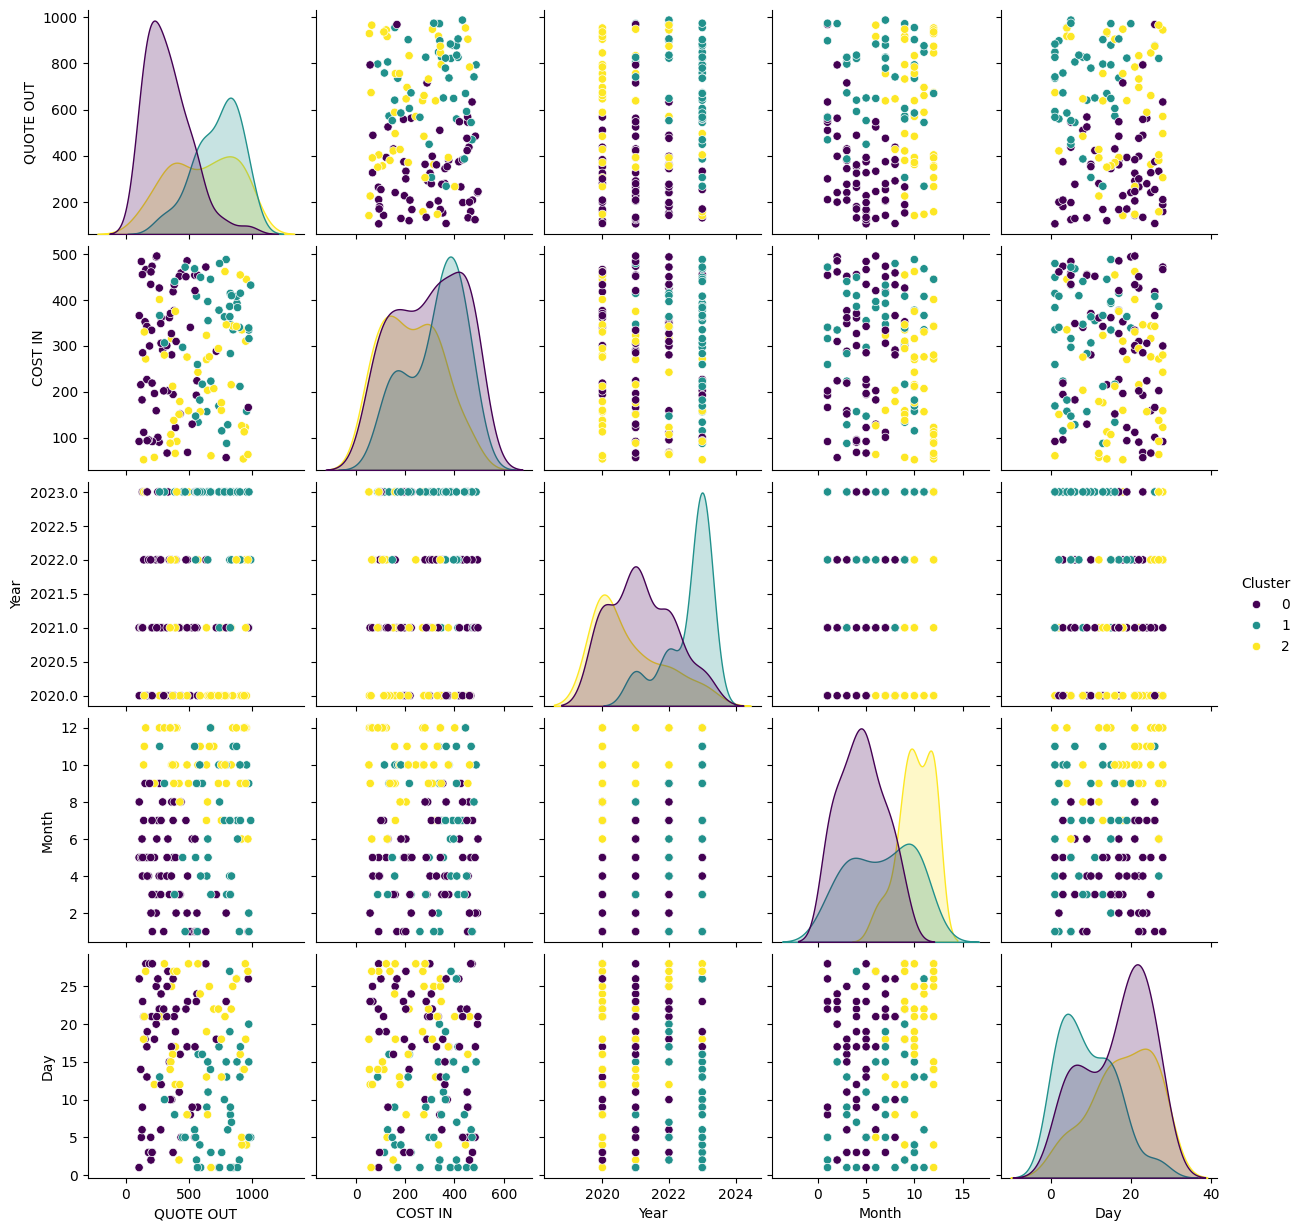

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset (Assuming df is already loaded)
# df = pd.read_csv('your_data.csv')  # Uncomment if loading from a file

# Select only the numerical columns for clustering
numeric_cols = ['QUOTE OUT', 'COST IN', 'Year', 'Month', 'Day']
df_numeric = df[numeric_cols]

# Standardize the data to give each feature equal weight
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Use the Elbow Method to determine the optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares
max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

# Set optimal number of clusters (choose based on elbow plot)
optimal_k = 3  # Update this based on the elbow plot

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_numeric['Cluster'] = kmeans.fit_predict(X_scaled)

# Get Cluster Centroids (Inverse transform to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=numeric_cols)

# Display centroids
print("Cluster Centroids:")
print(centroid_df)

# Optional: Visualizing clusters
sns.pairplot(df_numeric, hue='Cluster', palette='viridis')
plt.show()
